In [1]:
import pandas as pd

In [2]:
RawData = pd.read_csv("failures.csv")

In [3]:
RawData

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [4]:
RawData.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

## Data conversion

### Convert date column to separate year, month, day columns

In [5]:
DateData = pd.DataFrame()
DateData[["Year", "Month", "Day"]] = RawData["date"].str.split("-", expand = True)
DateData["Year"] = DateData["Year"].astype("int")
DateData["Month"] = DateData["Month"].astype("int8")
DateData["Day"] = DateData["Day"].astype("int8")
RawData.drop("date", axis = 1, inplace = True)

In [6]:
DateData

,Year,Month,Day
0,2015,1,1
1,2015,1,1
2,2015,1,1
3,2015,1,1
4,2015,1,1
...,...,...,...
124489,2015,11,2
124490,2015,11,2
124491,2015,11,2
124492,2015,11,2


### Break device serial/id/?? into separate fields

In [7]:
RawData["device"].value_counts()

W1F0G9T7    304
W1F0FZPA    304
Z1F0GB8A    304
Z1F0QL3N    304
Z1F0KJDS    304
           ... 
S1F0B5QJ      5
S1F0CT4F      5
S1F08S38      5
S1F04KSC      4
W1F0WJFT      3
Name: device, Length: 1168, dtype: int64

In [8]:
# Every value in "device" is exactly 8 characters long
RawData["device"].apply(len).value_counts()

8    124494
Name: device, dtype: int64

In [9]:
# Characterizing values used in each column
for index in range(len(RawData["device"][0])):
    print("Index: ", index)
    print(RawData["device"].str.get(index).value_counts())
    print("")

Index:  0
S    54858
W    43268
Z    26368
Name: device, dtype: int64

Index:  1
1    124494
Name: device, dtype: int64

Index:  2
F    124494
Name: device, dtype: int64

Index:  3
0    75332
1    48911
2      251
Name: device, dtype: int64

Index:  4
L    12700
3    10980
S     7328
C     6816
T     6447
1     6294
0     5945
R     5772
G     5164
B     4432
Q     4053
M     3706
F     3616
2     3441
K     3314
D     2906
4     2895
Z     2651
J     2612
P     2460
V     2413
X     2223
A     2077
W     1896
9     1892
H     1727
7     1519
N     1500
Y     1282
8     1236
E     1226
6     1104
5      867
Name: device, dtype: int64

Index:  5
6    7818
K    7524
5    5865
S    5605
L    5034
3    4517
4    4428
Y    4404
J    4264
Q    4177
B    4005
G    3984
R    3802
P    3769
C    3613
N    3591
M    3579
Z    3539
1    3456
A    3419
H    3349
2    3208
0    3166
V    3019
F    2900
7    2899
9    2897
X    2806
D    2532
E    2354
8    1931
T    1607
W    1433
Name: device, dty

In [10]:
for index in range(len(RawData["device"][0])):
    print("Index: ", index)
    print(RawData["device"].str.get(index).unique())
    print("")

Index:  0
['S' 'W' 'Z']

Index:  1
['1']

Index:  2
['F']

Index:  3
['0' '1' '2']

Index:  4
['1' '2' '3' '4' '5' '6' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'J' 'K'
 'L' 'M' 'P' 'Q' 'R' 'S' 'T' 'V' 'W' 'X' 'Y' '0' '7' 'N' 'Z']

Index:  5
['0' '6' 'E' 'J' 'R' 'T' 'X' '3' 'A' 'D' 'L' 'M' 'P' 'V' 'W' '1' '2' '5'
 '7' '9' 'Y' '4' 'K' 'B' 'N' 'F' 'Z' 'S' 'Q' 'G' 'C' 'H' '8']

Index:  6
['8' '6' 'E' '2' 'D' 'H' '0' 'Z' 'V' '3' 'G' '7' 'A' 'F' 'S' 'R' '1' '5'
 'X' '9' 'P' 'Q' 'K' 'B' '4' 'W' 'Y' 'T' 'M' 'J' 'L' 'C' 'N']

Index:  7
['5' 'B' 'Y' '0' 'J' '2' 'N' '8' 'A' '6' 'X' 'T' 'R' 'P' 'V' 'E' '3' 'M'
 'C' 'Q' '4' '1' 'Z' 'K' 'W' 'S' '9' 'F' 'L' 'H' 'D' 'G' '7']



In [11]:
RawData["device"].str.match(r"([A-Z])1F([0-2])([A-Z0-9])([A-Z0-9])([A-Z0-9])([A-Z0-9])").sum() == RawData["device"].count()

True

In [12]:
# index 5-7 of "device" contain digits 0-9 and letters A-Z
#RawData["device"].str.get(5).value_counts().reset_index().sort_values(by="index")

In [13]:
# Extract each column of "device"
DeviceData = pd.DataFrame()

for index in range(len(RawData["device"][0])):
    DeviceData["Device" + str(index)] = (RawData["device"].str.get(index)).astype("category")
DeviceData["Device3"] = DeviceData["Device3"].astype("int8")

In [14]:
# Extract pairs, triplets, etc. of each permutable column of "device"

for count in range(2, 6):
    for index in range(3, 9-count):
        columnLabel = "Device"
        for labelRange in range(0, count):
            columnLabel = columnLabel + str(index + labelRange)
        DeviceData[columnLabel] = RawData["device"].str[index:index + count] # One extra because substring indexing
        DeviceData[columnLabel] = DeviceData[columnLabel].astype("category")

In [15]:
DeviceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 18 columns):
Device0        124494 non-null category
Device1        124494 non-null category
Device2        124494 non-null category
Device3        124494 non-null int8
Device4        124494 non-null category
Device5        124494 non-null category
Device6        124494 non-null category
Device7        124494 non-null category
Device34       124494 non-null category
Device45       124494 non-null category
Device56       124494 non-null category
Device67       124494 non-null category
Device345      124494 non-null category
Device456      124494 non-null category
Device567      124494 non-null category
Device3456     124494 non-null category
Device4567     124494 non-null category
Device34567    124494 non-null category
dtypes: category(17), int8(1)
memory usage: 3.6 MB


In [16]:
RawData.drop("device", axis = 1, inplace = True)

In [17]:
RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 10 columns):
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10)
memory usage: 9.5 MB


## Drop columns that have the same data for every row
Note:  None of the columns have null values

In [18]:
CombinedData = pd.concat([RawData, DateData, DeviceData], axis = 1)
CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 31 columns):
failure        124494 non-null int64
attribute1     124494 non-null int64
attribute2     124494 non-null int64
attribute3     124494 non-null int64
attribute4     124494 non-null int64
attribute5     124494 non-null int64
attribute6     124494 non-null int64
attribute7     124494 non-null int64
attribute8     124494 non-null int64
attribute9     124494 non-null int64
Year           124494 non-null int32
Month          124494 non-null int8
Day            124494 non-null int8
Device0        124494 non-null category
Device1        124494 non-null category
Device2        124494 non-null category
Device3        124494 non-null int8
Device4        124494 non-null category
Device5        124494 non-null category
Device6        124494 non-null category
Device7        124494 non-null category
Device34       124494 non-null category
Device45       124494 non-null category
Device56      

In [19]:
for column in CombinedData.columns:
    if(len(CombinedData[column].unique()) == 1):
        CombinedData.drop(column, axis = 1, inplace = True)

In [20]:
CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 28 columns):
failure        124494 non-null int64
attribute1     124494 non-null int64
attribute2     124494 non-null int64
attribute3     124494 non-null int64
attribute4     124494 non-null int64
attribute5     124494 non-null int64
attribute6     124494 non-null int64
attribute7     124494 non-null int64
attribute8     124494 non-null int64
attribute9     124494 non-null int64
Month          124494 non-null int8
Day            124494 non-null int8
Device0        124494 non-null category
Device3        124494 non-null int8
Device4        124494 non-null category
Device5        124494 non-null category
Device6        124494 non-null category
Device7        124494 non-null category
Device34       124494 non-null category
Device45       124494 non-null category
Device56       124494 non-null category
Device67       124494 non-null category
Device345      124494 non-null category
Device456  

In [21]:
CombinedData.duplicated().value_counts()

False    124494
dtype: int64

## Normalize data

In [22]:
import numpy as np

In [23]:
def ShowSimpleScatter(DataSeries, width = 5, height = 5):
    import matplotlib.pyplot as plotter
    %matplotlib inline

    plotter.close("all")
    axes = plotter.figure(figsize = (width, height)).add_subplot(111)  # RowsColumnsIndex
                                                        # Index starts upper left corner
    x_data = list(range(len(DataSeries)))
    axes.scatter(x_data, DataSeries, s = 1, edgecolors = None)
    plotter.show()

In [24]:
def ShowSimpleHist(Data_List, width = 7, height = 7):
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.close()
    axes = plt.figure(figsize=(width, height)).add_subplot(111)  # RowsColumnsIndex
                                                        # Index starts upper left corner
    plt.hist(Data_List)
    plt.show()

In [25]:
CombinedData.skew(axis = 0)

failure       34.227194
attribute1    -0.011115
attribute2    23.857923
attribute3    82.712278
attribute4    41.502611
attribute5     3.483680
attribute6    -0.375291
attribute7    73.476456
attribute8    73.476456
attribute9    49.899278
Month          0.564712
Day            0.109559
Device3        0.471741
dtype: float64

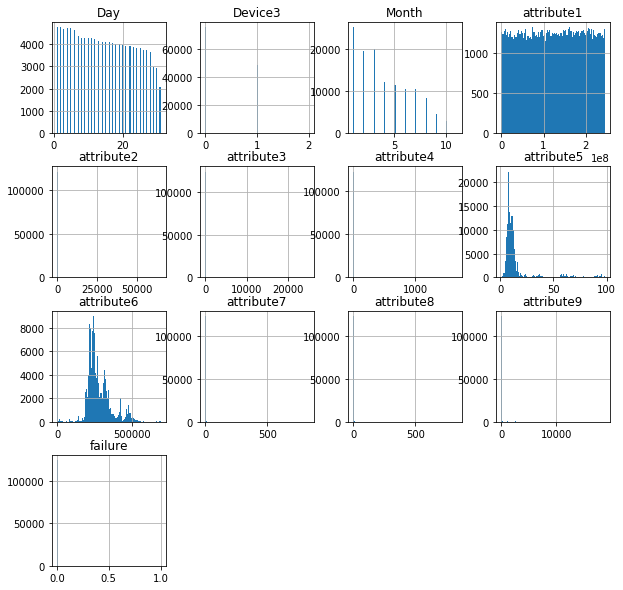

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
CombinedData.hist(bins=100, figsize=(10, 10))
plt.show()

In [27]:
CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 28 columns):
failure        124494 non-null int64
attribute1     124494 non-null int64
attribute2     124494 non-null int64
attribute3     124494 non-null int64
attribute4     124494 non-null int64
attribute5     124494 non-null int64
attribute6     124494 non-null int64
attribute7     124494 non-null int64
attribute8     124494 non-null int64
attribute9     124494 non-null int64
Month          124494 non-null int8
Day            124494 non-null int8
Device0        124494 non-null category
Device3        124494 non-null int8
Device4        124494 non-null category
Device5        124494 non-null category
Device6        124494 non-null category
Device7        124494 non-null category
Device34       124494 non-null category
Device45       124494 non-null category
Device56       124494 non-null category
Device67       124494 non-null category
Device345      124494 non-null category
Device456  

In [28]:
# RawData["Attribute1(0-1)"] = RawData["attribute1"] / RawData["attribute1"].max()
for number in range(1, 10):
    oldColumnLabel = "attribute" + str(number)
    newColumnLabel = "Attribute" + str(number) + "Rescaled"
    CombinedData[newColumnLabel] = RawData[oldColumnLabel] / RawData[oldColumnLabel].max()

In [29]:
(np.log((RawData["attribute5"]))).describe()

count    124494.000000
mean          2.382961
std           0.618827
min           0.000000
25%           2.079442
50%           2.302585
75%           2.484907
max           4.584967
Name: attribute5, dtype: float64

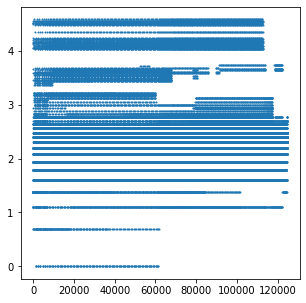

In [30]:
ShowSimpleScatter(np.log((RawData["attribute5"])))

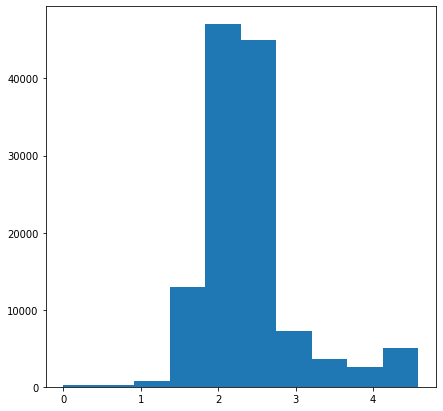

In [31]:
ShowSimpleHist(np.log((RawData["attribute5"])))

In [32]:
CombinedData["log(attribute5)"] = np.log((RawData["attribute5"]))

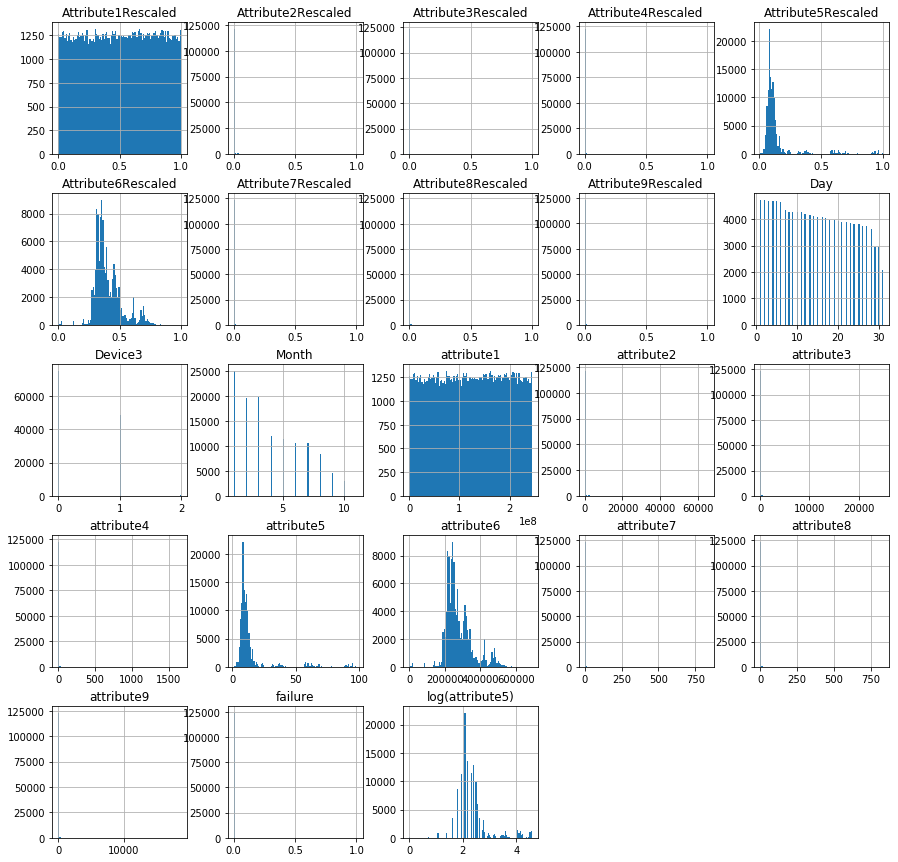

In [33]:
CombinedData.hist(bins=100, figsize=(15, 15))
plt.show()

## Add flags for attributes with massive number of zeroes

In [34]:
for number in range(1,10):
    columnLabel = "attribute" + str(number)
    CombinedData["HasAttribute" + str(number)] = RawData[columnLabel].apply(lambda x: 0 if (x == 0) else 1)

In [35]:
CombinedData

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,...,log(attribute5),HasAttribute1,HasAttribute2,HasAttribute3,HasAttribute4,HasAttribute5,HasAttribute6,HasAttribute7,HasAttribute8,HasAttribute9
0,0,215630672,56,0,52,6,407438,0,0,7,...,1.791759,1,1,0,1,1,1,0,0,1
1,0,61370680,0,3,0,6,403174,0,0,0,...,1.791759,1,0,1,0,1,1,0,0,0
2,0,173295968,0,0,0,12,237394,0,0,0,...,2.484907,1,0,0,0,1,1,0,0,0
3,0,79694024,0,0,0,6,410186,0,0,0,...,1.791759,1,0,0,0,1,1,0,0,0
4,0,135970480,0,0,0,15,313173,0,0,3,...,2.708050,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0,18310224,0,0,0,10,353705,8,8,0,...,2.302585,1,0,0,0,1,1,1,1,0
124490,0,172556680,96,107,4,11,332792,0,0,13,...,2.397895,1,1,1,1,1,1,0,0,1
124491,0,19029120,4832,0,0,11,350410,0,0,0,...,2.397895,1,1,0,0,1,1,0,0,0
124492,0,226953408,0,0,0,12,358980,0,0,0,...,2.484907,1,0,0,0,1,1,0,0,0


# Trim outliers

In [36]:
# Removing outliers from a DataFrame
def OutliersRemoved(DataFrame, ColumnLabel, Sigma = 3):
    DataFrame = DataFrame[(DataFrame[ColumnLabel] < (DataFrame[ColumnLabel].mean() + (Sigma * DataFrame[ColumnLabel].std()))) & (DataFrame[ColumnLabel] > (DataFrame[ColumnLabel].mean() - (Sigma * DataFrame[ColumnLabel].std())))]
    return DataFrame

In [37]:
TrimmedData = OutliersRemoved(CombinedData, "log(attribute5)")
TrimmedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121509 entries, 0 to 124493
Data columns (total 47 columns):
failure               121509 non-null int64
attribute1            121509 non-null int64
attribute2            121509 non-null int64
attribute3            121509 non-null int64
attribute4            121509 non-null int64
attribute5            121509 non-null int64
attribute6            121509 non-null int64
attribute7            121509 non-null int64
attribute8            121509 non-null int64
attribute9            121509 non-null int64
Month                 121509 non-null int8
Day                   121509 non-null int8
Device0               121509 non-null category
Device3               121509 non-null int8
Device4               121509 non-null category
Device5               121509 non-null category
Device6               121509 non-null category
Device7               121509 non-null category
Device34              121509 non-null category
Device45              121509 non-null 

In [38]:
TrimmedData = OutliersRemoved(TrimmedData, "attribute6")
TrimmedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121432 entries, 0 to 124493
Data columns (total 47 columns):
failure               121432 non-null int64
attribute1            121432 non-null int64
attribute2            121432 non-null int64
attribute3            121432 non-null int64
attribute4            121432 non-null int64
attribute5            121432 non-null int64
attribute6            121432 non-null int64
attribute7            121432 non-null int64
attribute8            121432 non-null int64
attribute9            121432 non-null int64
Month                 121432 non-null int8
Day                   121432 non-null int8
Device0               121432 non-null category
Device3               121432 non-null int8
Device4               121432 non-null category
Device5               121432 non-null category
Device6               121432 non-null category
Device7               121432 non-null category
Device34              121432 non-null category
Device45              121432 non-null 

# Model train and test

In [39]:
# Run through multiple classifiers and rank results

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def AssessClassifierModels(TrainingDataColumns, TrainingDataResults, TestingDataColumns, TestingDataResults, Algorithms_List):
    # results container
    results_list = pd.DataFrame( columns = ["Name", "Accuracy", "Precision", "Recall", "F1"]) # Set index later to avoid empty row
    model_list = pd.DataFrame(columns = ["Name", "ModelData"])
    
    # calculated metrics and append to list
    for algorithm in Algorithms_List:
        algorithmObject = algorithm()

        algorithmObject.fit(TrainingDataColumns, TrainingDataResults)
        
        results_list = results_list.append({ "Name":  algorithm.__name__,
                                             "Accuracy":  accuracy_score(TestingDataResults, algorithmObject.predict(TestingDataColumns)),
                                             "Precision":  precision_score(TestingDataResults, algorithmObject.predict(TestingDataColumns)),
                                             "Recall":  recall_score(TestingDataResults, algorithmObject.predict(TestingDataColumns)),
                                             "F1":  f1_score(TestingDataResults, algorithmObject.predict(TestingDataColumns))
                                            }, ignore_index = True)
        model_list = model_list.append({ "Name" : algorithm.__name__,
                                         "ModelData" : algorithmObject
                                       }, ignore_index = True)

    # Set index to a meaningful value
    results_list.set_index("Name")
    return results_list.sort_values("F1", ascending = False), model_list

In [40]:
def ShowImportantFeatures(Model, FeatureNamesList, MaxFeatureCount = 10):
    printData = pd.DataFrame(columns = ["Feature", "Weight"])
    printData["Feature"] = FeatureNamesList
    printData["Weight"] = Model.feature_importances_
    printData.sort_values(by="Weight", ascending = False, inplace = True)
    
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.close()
    axes = plt.figure(figsize=(10, 10)).add_subplot(111)  # RowsColumnsIndex
                                                        # Index starts upper left corner
    plt.barh(printData["Feature"].tolist()[:MaxFeatureCount], printData["Weight"].tolist()[:MaxFeatureCount])
    plt.gca().invert_yaxis()
    plt.show()
    
    print(printData.head(MaxFeatureCount))

In [41]:
def TrainTestDataSet(DataFrame, PredictionColumnLabel):
    TrainingData_X_Failures, TestingData_X_Failures, TrainingData_Y_Failures, TestingData_Y_Failures = train_test_split(DataFrame[DataFrame[PredictionColumnLabel] == 0].drop(PredictionColumnLabel, axis = 1), DataFrame.loc[DataFrame[PredictionColumnLabel] == 0, PredictionColumnLabel], test_size = 0.002, random_state = 13)
    TrainingData_X_Failures, TestingData_X_Failures, TrainingData_Y_Failures, TestingData_Y_Failures = train_test_split(TestingData_X_Failures, TestingData_Y_Failures, test_size = 0.2, random_state = 13)
    TrainingData_X_Successes, TestingData_X_Successes, TrainingData_Y_Successes, TestingData_Y_Successes = train_test_split(DataFrame[DataFrame[PredictionColumnLabel] == 1].drop(PredictionColumnLabel, axis = 1), DataFrame.loc[DataFrame[PredictionColumnLabel] == 1, PredictionColumnLabel], test_size = 0.2, random_state = 13)

    TrainingData_X = TrainingData_X_Failures.append(TrainingData_X_Successes)
    TrainingData_Y = TrainingData_Y_Failures.append(TrainingData_Y_Successes)

    TestingData_X = TestingData_X_Failures.append(TestingData_X_Successes)
    TestingData_Y = TestingData_Y_Failures.append(TestingData_Y_Successes)

    ModelScores_List, ModelParameters_List = AssessClassifierModels(TrainingData_X, TrainingData_Y, TestingData_X, TestingData_Y, [GaussianNB, BernoulliNB, KNeighborsClassifier, DecisionTreeClassifier, GradientBoostingClassifier])
    print(ModelScores_List)

    TrainedModel = ModelParameters_List[ModelParameters_List["Name"] == "GradientBoostingClassifier"]["ModelData"].iloc[0]

    ShowImportantFeatures(TrainedModel, TrainingData_X.columns, 20)
    
    return ModelScores_List, ModelParameters_List

In [42]:
TrainingData = pd.get_dummies(TrimmedData, drop_first = True)
TrainingData

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,...,Device34567_1Q9BD,Device34567_1R76A,Device34567_1RE71,Device34567_1RJFA,Device34567_1VMZB,Device34567_1VQFY,Device34567_1ZVME,Device34567_26YZB,Device34567_282ZV,Device34567_2PBHX
0,0,215630672,56,0,52,6,407438,0,0,7,...,0,0,0,0,0,0,0,0,0,0
1,0,61370680,0,3,0,6,403174,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,173295968,0,0,0,12,237394,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,79694024,0,0,0,6,410186,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,135970480,0,0,0,15,313173,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0,18310224,0,0,0,10,353705,8,8,0,...,0,0,0,0,0,0,0,0,0,0
124490,0,172556680,96,107,4,11,332792,0,0,13,...,0,0,0,0,0,0,0,0,0,0
124491,0,19029120,4832,0,0,11,350410,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124492,0,226953408,0,0,0,12,358980,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
(RawData[RawData["failure"] == 1]["failure"].count()) / RawData["failure"].count()

0.000851446656063746

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                         Name  Accuracy  Precision    Recall        F1
3      DecisionTreeClassifier  0.857143   0.761905  0.761905  0.761905
4  GradientBoostingClassifier  0.842857   0.777778  0.666667  0.717949
0                  GaussianNB  0.728571   1.000000  0.095238  0.173913
2        KNeighborsClassifier  0.571429   0.200000  0.142857  0.166667
1                 BernoulliNB  0.700000   0.000000  0.000000  0.000000


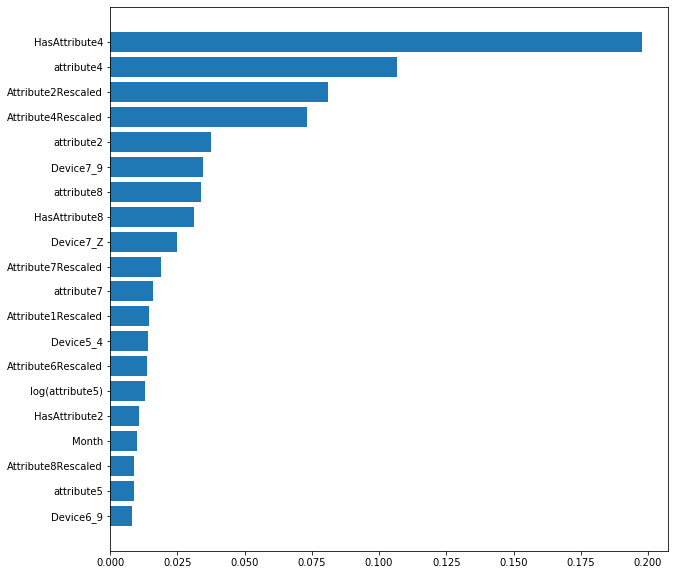

                Feature    Weight
25        HasAttribute4  0.197576
3            attribute4  0.106563
13   Attribute2Rescaled  0.081014
15   Attribute4Rescaled  0.073220
1            attribute2  0.037574
137           Device7_9  0.034656
7            attribute8  0.033634
29        HasAttribute8  0.031283
160           Device7_Z  0.025013
18   Attribute7Rescaled  0.018985
6            attribute7  0.015888
12   Attribute1Rescaled  0.014494
68            Device5_4  0.014076
17   Attribute6Rescaled  0.013737
21      log(attribute5)  0.013021
23        HasAttribute2  0.010894
9                 Month  0.009917
19   Attribute8Rescaled  0.009032
4            attribute5  0.009018
105           Device6_9  0.008292


In [45]:
ModelScores_List, ModelParameters_List = TrainTestDataSet(TrainingData, "failure")

In [ ]:
# TrainingData_X_Failures, TestingData_X_Failures, TrainingData_Y_Failures, TestingData_Y_Failures = train_test_split(TrainingData[TrainingData["failure"] == 0].drop("failure", axis = 1), TrainingData.loc[TrainingData["failure"] == 0, "failure"], test_size = 0.002, random_state = 13)
# TrainingData_X_Failures, TestingData_X_Failures, TrainingData_Y_Failures, TestingData_Y_Failures = train_test_split(TestingData_X_Failures, TestingData_Y_Failures, test_size = 0.2, random_state = 13)
# TrainingData_X_Successes, TestingData_X_Successes, TrainingData_Y_Successes, TestingData_Y_Successes = train_test_split(TrainingData[TrainingData["failure"] == 1].drop("failure", axis = 1), TrainingData.loc[TrainingData["failure"] == 1, "failure"], test_size = 0.2, random_state = 13)

# TrainingData_X = TrainingData_X_Failures.append(TrainingData_X_Successes)
# TrainingData_Y = TrainingData_Y_Failures.append(TrainingData_Y_Successes)

# TestingData_X = TestingData_X_Failures.append(TestingData_X_Successes)
# TestingData_Y = TestingData_Y_Failures.append(TestingData_Y_Successes)

# ModelScores_List, ModelParameters_List = AssessClassifierModels(TrainingData_X, TrainingData_Y, TestingData_X, TestingData_Y, [GaussianNB, BernoulliNB, KNeighborsClassifier, DecisionTreeClassifier, GradientBoostingClassifier])
# print(ModelScores_List)

In [ ]:
# TrainedModel = ModelParameters_List[ModelParameters_List["Name"] == "GradientBoostingClassifier"]["ModelData"].iloc[0]

# ShowImportantFeatures(TrainedModel, TrainingData_X.columns, 20)

# Generate additional columns

In [46]:
RawData.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [47]:
RawData.columns

Index(['failure', 'attribute1', 'attribute2', 'attribute3', 'attribute4',
       'attribute5', 'attribute6', 'attribute7', 'attribute8', 'attribute9'],
      dtype='object')

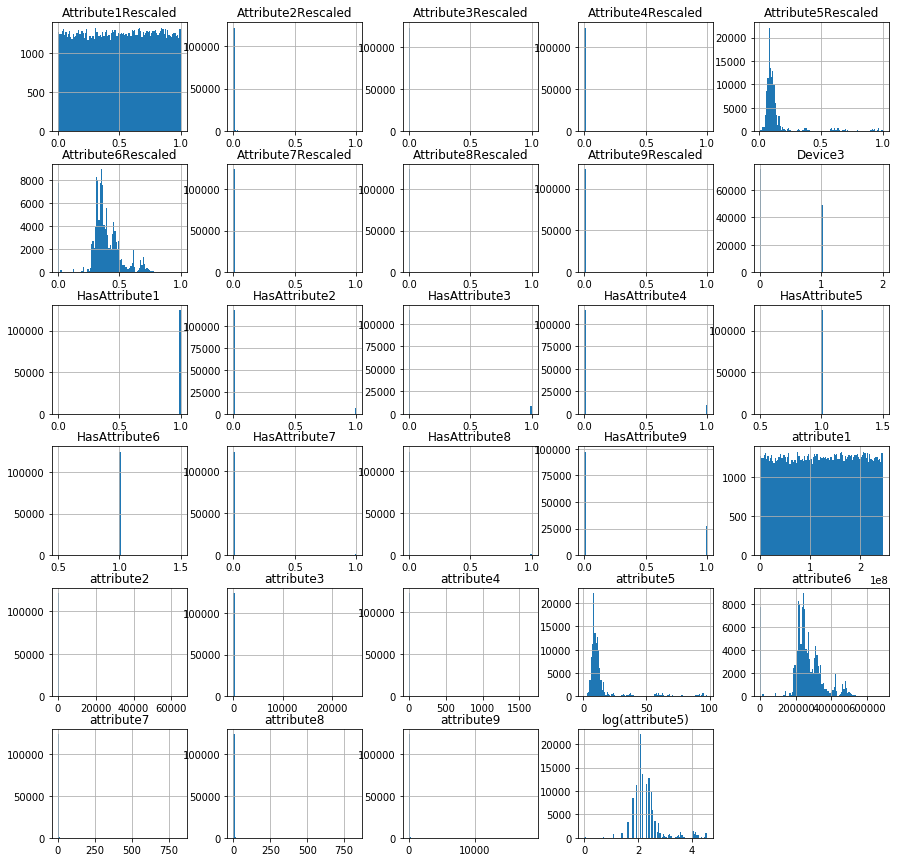

In [53]:
CombinedData[CombinedData.drop(["failure", "Month", "Day"], axis = 1).select_dtypes(exclude=["object", "category"]).columns].hist(bins=100, figsize=(15, 15))
plt.show()

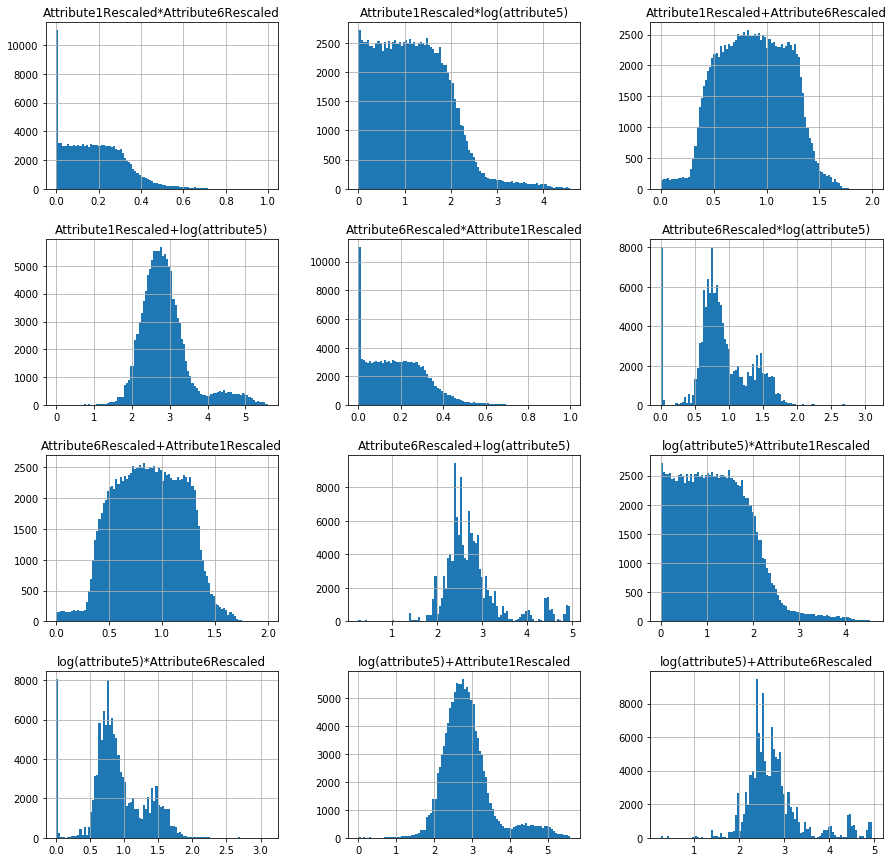

In [55]:
ExpandedData = pd.DataFrame()

for column1 in ["Attribute1Rescaled", "Attribute6Rescaled", "log(attribute5)"]:
    for column2 in ["Attribute1Rescaled", "Attribute6Rescaled", "log(attribute5)"]:
        if(column1 != column2):
            newColumnLabel = str(column1) + "+" + str(column2)
            ExpandedData[newColumnLabel] = CombinedData[column1] + CombinedData[column2]

            newColumnLabel = str(column1) + "*" + str(column2)
            ExpandedData[newColumnLabel] = CombinedData[column1] * CombinedData[column2]

ExpandedData.hist(bins = 100, figsize=(15, 15))
plt.show()

In [64]:
ExpandedTrainingData = pd.get_dummies(pd.concat([CombinedData, ExpandedData], axis = 1), drop_first = True)
ExpandedTrainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Columns: 8391 entries, failure to Device34567_2PBHX
dtypes: float64(22), int64(19), int8(3), uint8(8347)
memory usage: 1.0 GB


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                         Name  Accuracy  Precision    Recall        F1
4  GradientBoostingClassifier  0.791667   0.705882  0.545455  0.615385
3      DecisionTreeClassifier  0.750000   0.600000  0.545455  0.571429
0                  GaussianNB  0.736111   1.000000  0.136364  0.240000
2        KNeighborsClassifier  0.625000   0.307692  0.181818  0.228571
1                 BernoulliNB  0.694444   0.000000  0.000000  0.000000


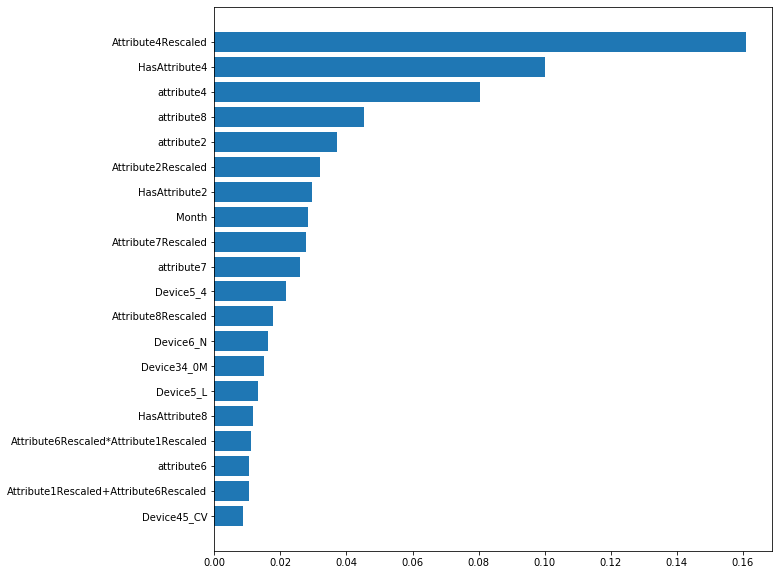

                                   Feature    Weight
15                      Attribute4Rescaled  0.160867
25                           HasAttribute4  0.100034
3                               attribute4  0.080432
7                               attribute8  0.045183
1                               attribute2  0.037167
13                      Attribute2Rescaled  0.032001
23                           HasAttribute2  0.029461
9                                    Month  0.028288
18                      Attribute7Rescaled  0.027689
6                               attribute7  0.025868
80                               Device5_4  0.021602
19                      Attribute8Rescaled  0.017689
130                              Device6_N  0.016119
193                            Device34_0M  0.014908
96                               Device5_L  0.013338
29                           HasAttribute8  0.011592
36   Attribute6Rescaled*Attribute1Rescaled  0.011205
5                               attribute6  0.

In [65]:
ModelScores_List, ModelParameters_List = TrainTestDataSet(ExpandedTrainingData, "failure")

In [66]:
FilteredTrainingData = pd.concat([
    ExpandedTrainingData[
        pd.DataFrame({
            "Features" : ExpandedTrainingData.drop("failure", axis = 1).columns.to_list(),
            "Weights" : ModelParameters_List.loc[ModelParameters_List["Name"] == "GradientBoostingClassifier", "ModelData"].to_list()[0].feature_importances_
        }).sort_values(by="Weights", ascending = False).iloc[0:20]["Features"].to_list()
    ], ExpandedTrainingData["failure"]
], axis = 1)

FilteredTrainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 21 columns):
Attribute4Rescaled                       124494 non-null float64
HasAttribute4                            124494 non-null int64
attribute4                               124494 non-null int64
attribute8                               124494 non-null int64
attribute2                               124494 non-null int64
Attribute2Rescaled                       124494 non-null float64
HasAttribute2                            124494 non-null int64
Month                                    124494 non-null int8
Attribute7Rescaled                       124494 non-null float64
attribute7                               124494 non-null int64
Device5_4                                124494 non-null uint8
Attribute8Rescaled                       124494 non-null float64
Device6_N                                124494 non-null uint8
Device34_0M                              124494 non-null uint8


                         Name  Accuracy  Precision    Recall        F1
1                 BernoulliNB  0.819444   0.695652  0.727273  0.711111
4  GradientBoostingClassifier  0.819444   0.736842  0.636364  0.682927
3      DecisionTreeClassifier  0.722222   0.555556  0.454545  0.500000
0                  GaussianNB  0.791667   1.000000  0.318182  0.482759
2        KNeighborsClassifier  0.750000   0.833333  0.227273  0.357143


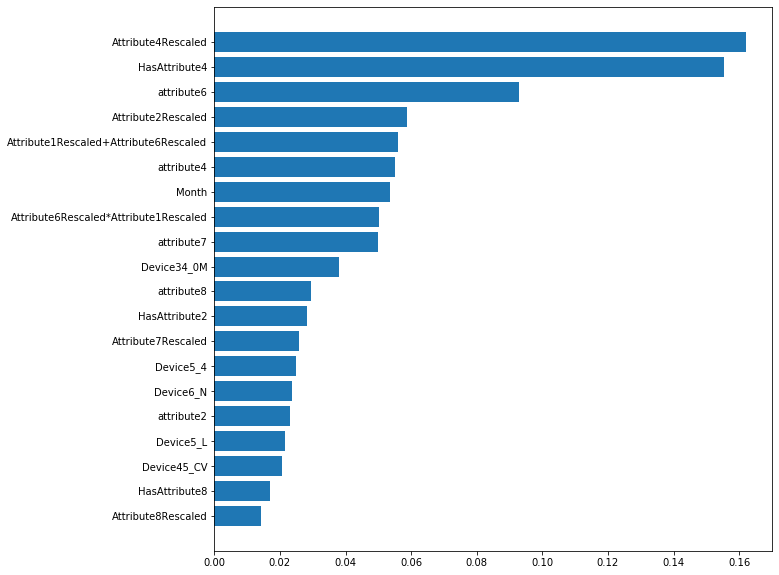

                                  Feature    Weight
0                      Attribute4Rescaled  0.162015
1                           HasAttribute4  0.155266
17                             attribute6  0.092847
5                      Attribute2Rescaled  0.058609
18  Attribute1Rescaled+Attribute6Rescaled  0.056013
2                              attribute4  0.055135
7                                   Month  0.053690
16  Attribute6Rescaled*Attribute1Rescaled  0.050144
9                              attribute7  0.050035
13                            Device34_0M  0.037901
3                              attribute8  0.029508
6                           HasAttribute2  0.028249
8                      Attribute7Rescaled  0.025964
10                              Device5_4  0.025013
12                              Device6_N  0.023536
4                              attribute2  0.022974
14                              Device5_L  0.021426
19                            Device45_CV  0.020531
15          

In [67]:
TrainTestDataSet(FilteredTrainingData, "failure");

                         Name  Accuracy  Precision    Recall        F1
4  GradientBoostingClassifier  0.847222   0.789474  0.681818  0.731707
1                 BernoulliNB  0.833333   0.812500  0.590909  0.684211
3      DecisionTreeClassifier  0.736111   0.588235  0.454545  0.512821
0                  GaussianNB  0.791667   1.000000  0.318182  0.482759
2        KNeighborsClassifier  0.750000   0.833333  0.227273  0.357143


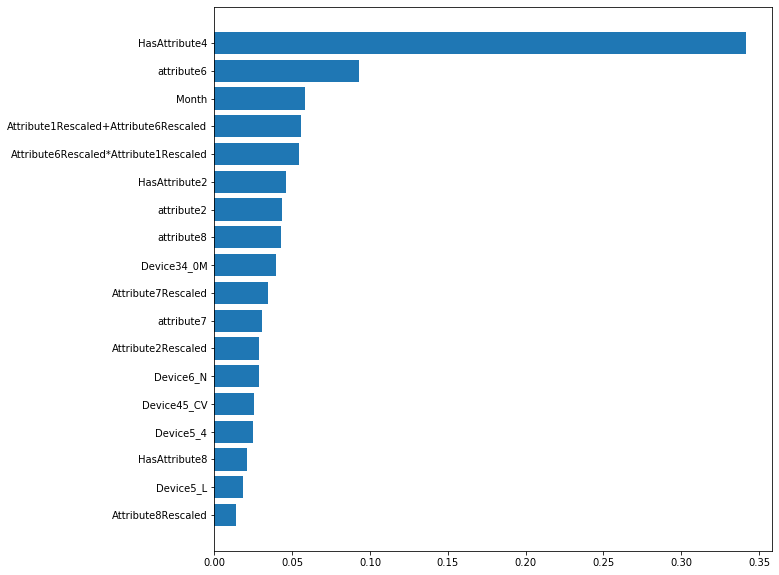

                                  Feature    Weight
0                           HasAttribute4  0.341419
15                             attribute6  0.092870
5                                   Month  0.058440
16  Attribute1Rescaled+Attribute6Rescaled  0.055374
14  Attribute6Rescaled*Attribute1Rescaled  0.054608
4                           HasAttribute2  0.046223
2                              attribute2  0.043440
1                              attribute8  0.042789
11                            Device34_0M  0.039654
6                      Attribute7Rescaled  0.034245
7                              attribute7  0.030667
3                      Attribute2Rescaled  0.028730
10                              Device6_N  0.028576
17                            Device45_CV  0.025357
8                               Device5_4  0.024834
13                          HasAttribute8  0.020672
12                              Device5_L  0.018345
9                      Attribute8Rescaled  0.013758


In [68]:
TrainTestDataSet(FilteredTrainingData.drop(["attribute4", "Attribute4Rescaled"], axis = 1), "failure");